<a href="https://colab.research.google.com/github/piyushaanand/Contents/blob/main/min_temp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [3]:
df = pd.read_csv('/content/min_temp_data_2.csv',index_col=0,parse_dates=True)
X = df.values
print('Shape of the Data \t',df.shape)
print('original Dateset : \n',df.head())
print('After Extracting only temperature : \n',X)

Shape of the Data 	 (10, 1)
original Dateset : 
             Temp
Date            
2023-01-09  21.8
2023-02-09  20.6
2023-03-09  22.5
2023-04-09  18.9
2023-05-09  16.4
After Extracting only temperature : 
 [[21.8]
 [20.6]
 [22.5]
 [18.9]
 [16.4]
 [15.9]
 [16.4]
 [19.4]
 [18.4]
 [20.8]]


<Axes: xlabel='Date '>

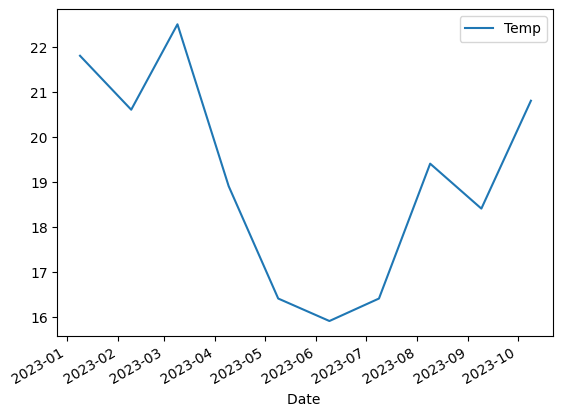

In [4]:
df.plot()


In [6]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print('1. ADF : ',dftest[0])
print("2 P-Value : ",dftest[1])
print("3 Number of Lags : ",dftest[2])
print("4. Num of Observation Used for ADF Regression and Critical Value calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -23.029855195970438
2 P-Value :  0.0
3 Number of Lags :  3
4. Num of Observation Used for ADF Regression and Critical Value calculation :  6
5. Critical Values : 
	 1% :  -5.354256481481482
	 5% :  -3.6462381481481483
	 10% :  -2.901197777777778


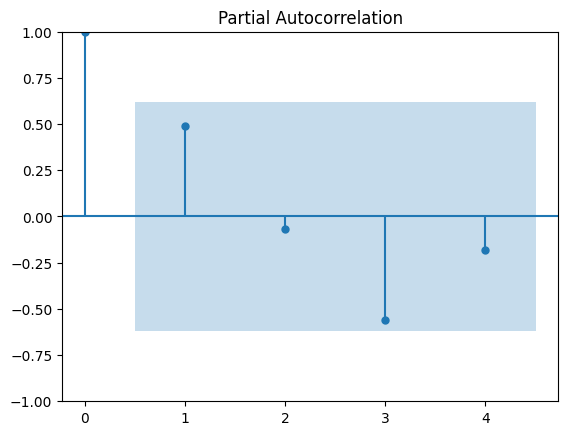

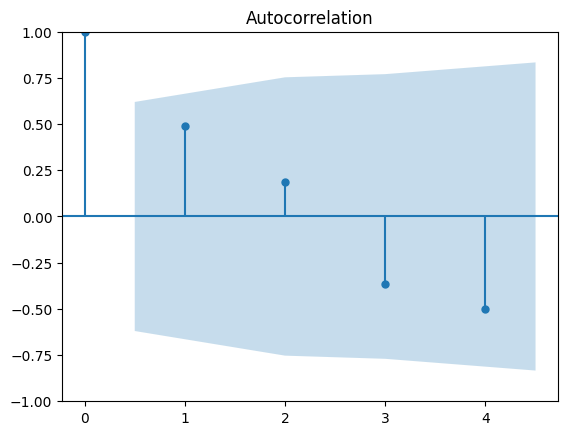

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf = plot_pacf(df['Temp'],lags = 4)
acf = plot_acf(df['Temp'],lags = 4)


In [23]:
train = X[:len(X)-2]
test = X[len(X)-2:]
model = AutoReg(train,lags=3).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                    8
Model:                     AutoReg(3)   Log Likelihood                  -4.085
Method:               Conditional MLE   S.D. of innovations              0.548
Date:                Tue, 12 Sep 2023   AIC                             18.169
Time:                        20:38:02   BIC                             16.216
Sample:                             3   HQIC                            12.928
                                    8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2964      2.402      8.450      0.000      15.588      25.004
y.L1           0.6212      0.135      4.604      0.000       0.357       0.886
y.L2          -0.3247      0.163     -1.995      0.0

In [25]:
print(len(train))

8


In [26]:
pred = model.predict(start = len(train),end = len(X)-1,dynamic=False)

[20.70189809 20.33778336]


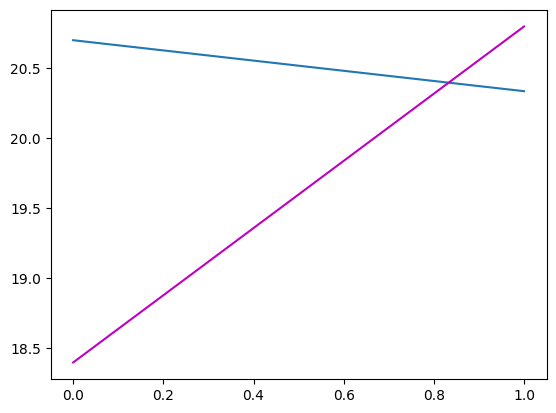

In [30]:
import matplotlib.pyplot as plt
plt.plot(pred)
plt.plot(test,color="m")
print(pred)

In [34]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

1.6601775582377472


In [36]:

pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("The prediction for the next weeks")
print(pred_future)
print("Number of Prediction Made : \t",len(pred_future))

The prediction for the next weeks
[16.9528577  16.73681089 17.83584256 19.20229082 19.78018519 19.25857714
 18.20367177]
Number of Prediction Made : 	 7
